In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('00690.csv')
df.set_index(pd.to_datetime(df['Date']),inplace=True)
df.drop('Date',axis=1,inplace=True)
df.head()

Price
Date             
2017-03-31  19.91
2017-04-05  19.95
2017-04-06  19.93
2017-04-07  19.84
2017-04-10  19.80

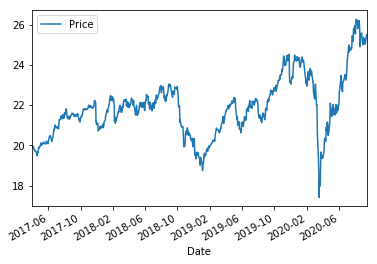

In [3]:
df.plot()

In [4]:
dr=df.pct_change(1)
r=dr.add(1).cumprod()
dd=r.div(r.cummax()).sub(1)

C:\Users\tinah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


In [15]:
mdd=dd.min()
end=dd.idxmin()
start=r.loc[:end[0]].idxmax()
days=end-start

In [16]:
days

Price   113 days
dtype: timedelta64[ns]

In [17]:
def MDD(df):
    dr=df.pct_change(1)
    r=dr.add(1).cumprod()
    dd=r.div(r.cummax()).sub(1)
    mdd=dd.min()
    end=dd.idxmin()
    start=r.loc[:end[0]].idxmax()
    days=end-start
    return mdd[0], start[0], end[0], days[0]

In [18]:
MDD(df)

(-0.2902568283734205,
 Timestamp('2019-11-27 00:00:00'),
 Timestamp('2020-03-19 00:00:00'),
 Timedelta('113 days 00:00:00'))